In [1]:
# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

Read the data

In [2]:
df = pd.read_csv("data/TASK-ML-INTERN.csv")

# 1. Data Exploration and Preprocessing

In [3]:
df.head(2)

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0


Dropping hsi_id feature will keep our data only numerical

In [4]:
# Drop the index feature
df = df.drop(columns=["hsi_id"])

In [5]:
print("data shape is:", df.shape)

data shape is: (500, 449)


In [6]:
# Check missing values
print("Number of nulls in the data: ",df.isnull().sum().sum())

Number of nulls in the data:  0


correlation matrix between spectral features and vomitoxin levels

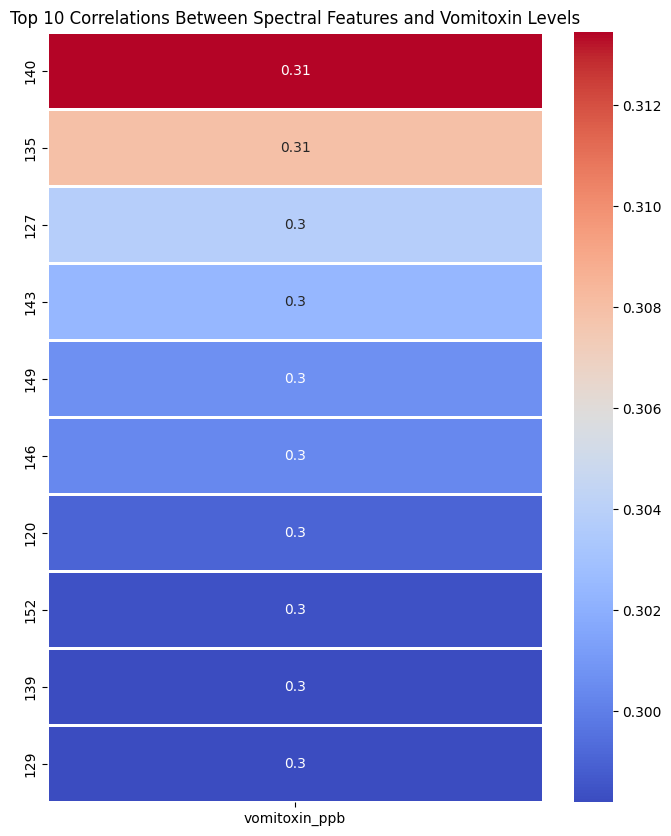

In [7]:
corr = df.corr()
top_features = corr[['vomitoxin_ppb']].abs().sort_values(by='vomitoxin_ppb', ascending=False)[1:11]
plt.figure(figsize=(8, 10))
sns.heatmap(top_features, cmap="coolwarm", annot=True, linewidths=.9)
plt.title("Top 10 Correlations Between Spectral Features and Vomitoxin Levels")
plt.show()

In [8]:
print("Statistics for spectral data: ")
df.describe().T

Statistics for spectral data: 


,count,mean,std,min,25%,50%,75%,max
0,500.0,0.443118,0.044719,0.311182,0.410456,0.449105,0.480245,0.556287
1,500.0,0.440761,0.045520,0.295321,0.404310,0.442651,0.478822,0.530168
2,500.0,0.433814,0.045764,0.284064,0.397038,0.434215,0.473158,0.528774
3,500.0,0.426122,0.046070,0.282054,0.389029,0.425074,0.464947,0.533202
4,500.0,0.418990,0.045405,0.296702,0.382102,0.417075,0.459232,0.511909
...,...,...,...,...,...,...,...,...
444,500.0,0.738738,0.053601,0.571767,0.700638,0.743965,0.775686,0.945225
445,500.0,0.738298,0.054014,0.577803,0.698655,0.743301,0.775621,0.932812
446,500.0,0.737599,0.054136,0.576985,0.698107,0.745216,0.774635,0.931381
447,500.0,0.738099,0.054297,0.562302,0.699673,0.745733,0.774310,0.957860


Let's check take a closer look at distribution of vomitoxin

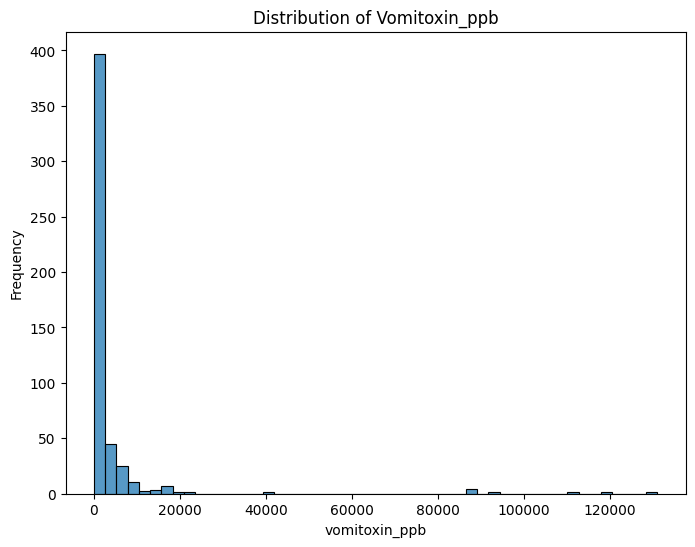

In [9]:
from src.utils import vomitoxin_distribution
vomitoxin_distribution(df)

boxplot to highlight outliers

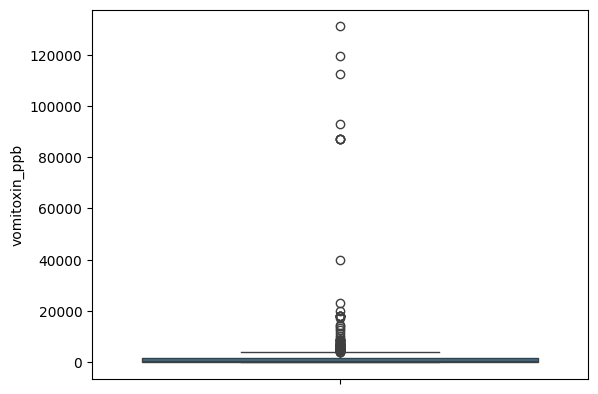

In [10]:
sns.boxplot(y=df["vomitoxin_ppb"])
plt.show()


## Summary of EDA
**Feature Range:**
* Most spectral features (0-447) have values between ~0.25 and 0.95
* The target value has a very large range: 0 to 131,000.

**STD**
* Most spectral features have a small standard deviation (~0.04 to 0.05).
* The target has an extremely high standard deviation (13,095.8), indicating extreme outliers.

I will standardize the data using Robust Scaling as it is best for skewed data and handling outliers

## Data Preprocessing


Standardization using RobustScaler

In [11]:
# Apply robust scaling
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

In [12]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,-0.471754,-0.614758,-0.331444,-0.687694,-0.412053,-0.619432,-0.671677,-0.738327,-0.694250,-0.357189,...,-0.443092,-0.392221,-0.404747,-0.522698,-0.639301,-0.681864,-0.414882,-0.621163,-0.552176,0.3840
1,-0.477261,-0.532721,-0.415801,-0.382775,-0.257789,-0.296352,-0.398205,-0.463133,-0.282433,-0.383551,...,-0.789744,-0.670959,-0.581353,-0.648621,-0.580916,-0.886725,-0.602612,-0.635992,-0.759386,0.3200
2,-0.860893,-0.958838,-0.802895,-0.674437,-0.726285,-0.828402,-0.957156,-0.907592,-0.919845,-0.882493,...,-0.802369,-1.056911,-1.105314,-0.918183,-0.910885,-1.172776,-1.096014,-0.969917,-1.079300,0.5120
3,0.282733,0.410739,0.377480,0.451291,0.578200,0.639012,0.705565,0.403491,0.305638,0.360693,...,-0.014180,-0.208540,-0.111704,-0.188798,0.100433,-0.072865,-0.011119,0.123366,-0.164237,0.5120
4,0.490724,0.598879,0.458992,0.824232,0.608718,0.523451,0.706028,0.580005,0.459226,0.602730,...,0.347993,0.373622,0.220951,0.263946,0.249551,0.000619,0.418169,0.198818,0.083815,-0.1792


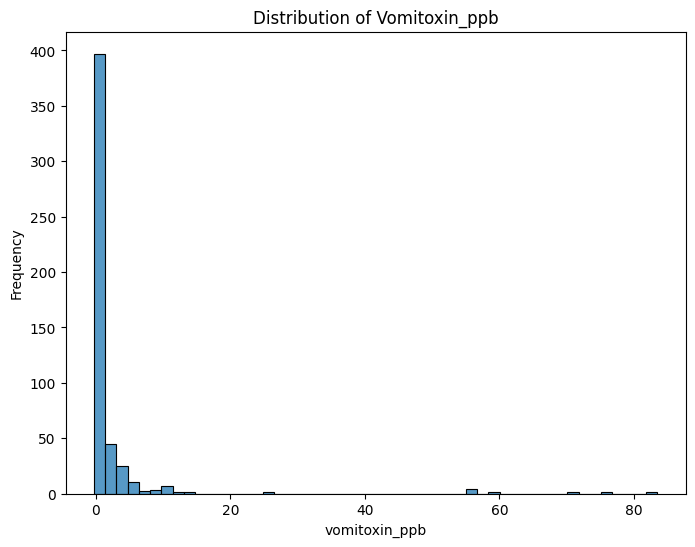

In [13]:
vomitoxin_distribution(df_scaled)

# 3. Dimensionality reduction

## PCA

In [14]:
X = df_scaled.drop(columns='vomitoxin_ppb')
y = df_scaled['vomitoxin_ppb']

# Apply PCA
pca = PCA(10)
X_pca = pca.fit_transform(X)

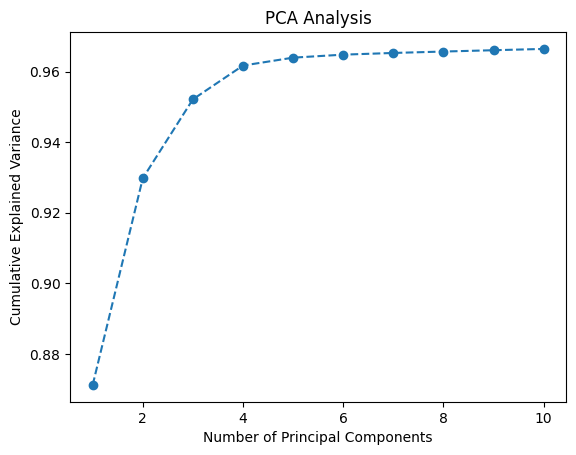

In [15]:
from src.utils import plot_pca_analysis
plot_pca_analysis(pca)

### PCA Analysis Results:
* the first 4 components explain ~95% of the variance
* the first 6 components explain ~97% of the variance
* Additional components do not contribute much new information

**conclusion**: to simplify model and reduce overfitting: we will use 4 components.

In [16]:
# Select the first 4 components
X_pca_selected = X_pca[:, :4]

# Convert PCA results into dataframe
df_pca = pd.DataFrame(X_pca_selected)
df_pca.columns = [f"PC{i+1}" for i in range(X_pca_selected.shape[1])]
df_pca["vomitoxin_ppb"] = y
df_pca.head()

,PC1,PC2,PC3,PC4,vomitoxin_ppb
0,-10.267679,1.728454,1.640070,-1.483660,0.3840
1,-10.302097,1.708163,0.728565,-0.540083,0.3200
2,-21.996333,-3.871879,-3.496241,0.736015,0.5120
3,3.267876,1.149669,1.757566,0.992075,0.5120
4,9.048259,-1.099132,-1.113984,2.015256,-0.1792


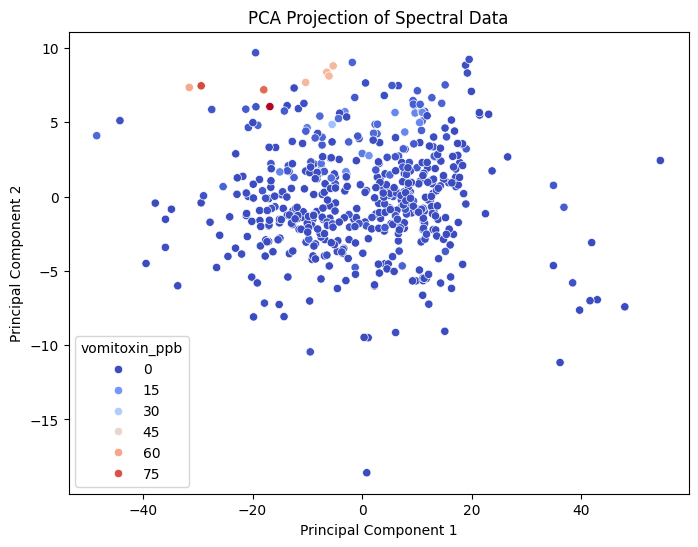

In [17]:
from src.utils import plot_pca_projection
plot_pca_projection(df_pca, 1,2)

high-toxin samples cluster together means PCA successfully captured important patterns.

# 4. Model Training

In [18]:
# Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### Random Forest

In [19]:
# Create a list to store model outputs
outputs = []

In [20]:
from src import modeling

# Random Forest
rf_baseline = modeling.train_baseline_model(X_train, y_train, 'rf')
rf_tuned = modeling.tune_random_forest(X_train, y_train)

# XGBoost
xgb_baseline = modeling.train_baseline_model(X_train, y_train, 'xgb')
xgb_tuned = modeling.tune_xgboost(X_train, y_train)


In [21]:
from src import evaluation

results = pd.DataFrame()
for name, model in [
    ('RF Baseline', rf_baseline),
    ('RF Tuned', rf_tuned),
    ('XGB Baseline', xgb_baseline),
    ('XGB Tuned', xgb_tuned)
]:
    metrics = evaluation.evaluate_model(model, X_test, y_test)
    results = pd.concat([results, evaluation.log_results(metrics, name)])


RF Baseline Results:
MAE: 1.4856
RMSE: 3.8958
R²: 0.8674

RF Tuned Results:
MAE: 1.3428
RMSE: 3.0557
R²: 0.9184

XGB Baseline Results:
MAE: 1.5510
RMSE: 5.4249
R²: 0.7430

XGB Tuned Results:
MAE: 2.2472
RMSE: 6.3676
R²: 0.6459



# 5. Models Evaluation

In [22]:
results

,mae,rmse,r2,model_name
0,1.485603,3.895776,0.867445,RF Baseline
0,1.342831,3.055714,0.918448,RF Tuned
0,1.551015,5.424923,0.742964,XGB Baseline
0,2.247156,6.367598,0.645874,XGB Tuned


<Figure size 1000x500 with 0 Axes>

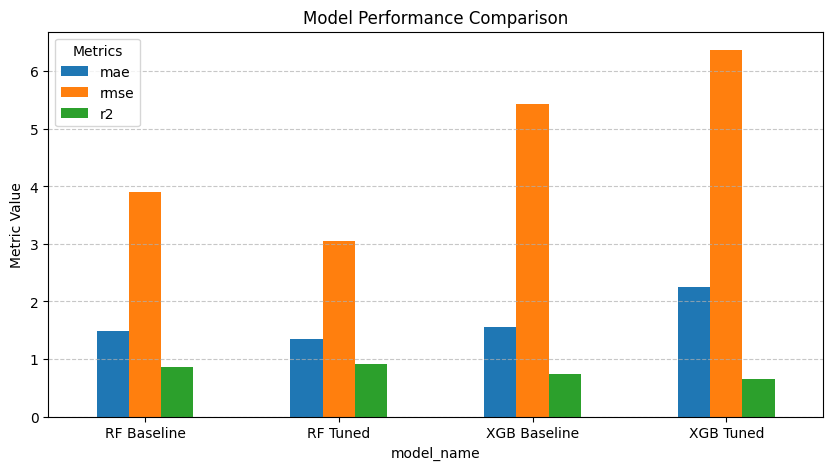

In [23]:
from src.utils import plot_metrics
plot_metrics(results)

# Feature explorations
- Apply a transformation (e.g., log transform) to reduce skew
- try PCA with 5 and 6 components
- try t-SNE
- Trying different deep learning models.
- split data before scaling to avoid data leakage